In [1]:
import bs4
import requests
import json
import pprint
import pandas as pd
import numpy as np 
import re
import warnings
from IPython.display import Image
from IPython.core.display import clear_output
from random import randint
from warnings import warn
from time import sleep
import time
TEMPS_ATTENTE = 5

/var/folders/jw/x1bzz2596zv2s_3yv0sf41gh0000gn/T/ipykernel_45337/743144750.py:10: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import clear_output


In [2]:
data = {'Brands' : ['BMW', 'AUDI', 'Toyota']}
frame= pd.DataFrame(data)
print(frame)

   Brands
0     BMW
1    AUDI
2  Toyota


In [3]:
import os
import requests
import bs4
import pprint

def imprime_le(resultat):
    if type(resultat) is requests.models.Response:
        # Make sure the directory exists
        os.makedirs('cars', exist_ok=True)
        
        with open('cars/Marques.html', 'w', encoding='utf-8') as fichier:
            objet_bs = bs4.BeautifulSoup(resultat.text, 'html.parser')
            fichier.write(objet_bs.prettify())
    elif type(resultat) is dict:
        # Make sure the directory exists
        os.makedirs('cars', exist_ok=True)
        
        with open('cars/temp_json.json', 'w', encoding='utf-8') as fichier:
            fichier.write(pprint.PrettyPrinter(indent=4).pformat(resultat))
    else:
        raise Exception('Objet non supporté')

# Load the page
sess = requests.session()
res = sess.get('https://www.lacentrale.fr/occasion-voiture.html') 

# Call function
imprime_le(res)


In [4]:
soup = bs4.BeautifulSoup(res.text, 'html.parser')
lacentrale_marques = soup.find_all('div', class_="makeModel")
car_brands = [a.find('a').get_text() for a in lacentrale_marques]
print(len(car_brands))  # number of brands

156


In [5]:
prefix = "https://www.lacentrale.fr"

marque = []
for marques in lacentrale_marques:
    mq = marques.find('a').get('href')
    if mq.startswith(prefix):
        mq = mq[len(prefix):]
    marque.append(mq)

In [6]:
df = pd.DataFrame({"Vehicule": marque})
df.head()

,Vehicule
0,/occasion-voiture-marque-abarth.html
1,/occasion-voiture-marque-ac.html
2,/occasion-voiture-marque-aiways.html
3,/occasion-voiture-marque-aixam.html
4,/occasion-voiture-marque-alfa+romeo.html


In [7]:
df_cars= df.Vehicule.map(lambda x : x.split('/occasion-voiture-marque-')[1]).map(lambda x : x.split('.html')[0])

In [8]:
df_cars.head() 

0        abarth
1            ac
2        aiways
3         aixam
4    alfa+romeo
Name: Vehicule, dtype: object

In [9]:
#Header
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.79 Safari/537.36',}

In [21]:
from bs4 import BeautifulSoup
import requests
from time import sleep
from random import randint
from warnings import warn

# Lists to store the scraped data
Energy = []
Model = []
Gear = []
Region = []
Year = []
KM = []
Price = []


# Iterate through each brand
for cars in df_cars:
    for i in range(1, 8):
        url = 'https://www.lacentrale.fr/occasion-voiture-marque-' + cars + '-' + str(i) + '.html'
        res = requests.get(url)

        # Throw a warning for non-200 status codes
        if res.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, res.status_code))

        soup = BeautifulSoup(res.text, 'html.parser')
        lacentrale_annonces = soup.find_all('div', class_="Vehiculecard_Vehiculecard_cardBody")

        # ...

        for annonces in lacentrale_annonces:

            # Model
            Brand_Model = annonces.find('h2', class_="Text_Text_text Vehiculecard_Vehiculecard_title Text_Text_subtitle2").text.strip()
            Model.append(Brand_Model)

            # Departement (Location)
            location_container = annonces.find_parent().find('div', class_='Vehiculecard_Vehiculecard_location Vehiculecard_Vehiculecard_locationVoirLaDistance')
            departement = location_container.find('div', class_='Text_Text_text Vehiculecard_Vehiculecard_city Text_Text_body2').text if location_container else ''
            Region.append(departement)

            # Year
            characteristics = annonces.find_all('div', class_='Text_Text_text Vehiculecard_Vehiculecard_characteristicsItems Text_Text_body2')
            if len(characteristics) >= 1:
                annee = characteristics[0].text
            else:
                annee = ''
            Year.append(annee)

            # KM
            if len(characteristics) >= 2:
                kilometrage = characteristics[1].text
            else:
                kilometrage = ''
            KM.append(kilometrage)

            # Gearbox 
            if len(characteristics) >= 3:
                car_gear = characteristics[2].text
            else:
                car_gear = ''
            Gear.append(car_gear)

            # Energy
            if len(characteristics) >= 4:
                car_energy = characteristics[3].text
            else:
                car_energy = ''
            Energy.append(car_energy)

            # Price
            price_container = annonces.find('div', class_='Vehiculecard_Vehiculecard_cardInformationWithBadge')
            price_span = price_container.find('span', class_='Vehiculecard_Vehiculecard_price') if price_container else None
            prix = price_span.text.strip() if price_span else ''
            Price.append(prix)

        # ...


/var/folders/jw/x1bzz2596zv2s_3yv0sf41gh0000gn/T/ipykernel_45337/2690101530.py:25: UserWarning: Request: <module 'requests' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/requests/__init__.py'>; Status code: 400
  warn('Request: {}; Status code: {}'.format(requests, res.status_code))


In [22]:
df = pd.DataFrame(data= {
                    "Brand_Model" : Model,
                    "departement" : Region ,
                    "annee" : Year,
                    "prix" : Price,
                    "kilometrage" : KM, "Gear": Gear , "Energy": Energy,
                  })
df

,Brand_Model,departement,annee,prix,kilometrage,Gear,Energy
0,ABARTH 500 C II phase 2,,2019,37 500 €,21 250 km,Automatique,Essence
1,ABARTH 500 II phase 2,45 ‌,2017,16 480 €,123 235 km,Manuelle,Essence
2,ABARTH 500 C II phase 2,92 ‌,2019,34 160 €,25 153 km,Automatique,Essence
3,ABARTH 500 II phase 2,33 ‌,2022,32 360 €,17 156 km,Automatique,Essence
4,ABARTH 500 II phase 2,91 ‌,2022,26 870 €,34 440 km,Manuelle,Essence
...,...,...,...,...,...,...,...
7274,WESTFIELD FW300,70 ‌,2012,52 320 €,41 975 km,Manuelle,Essence
7275,WIESMANN GT MF4,69 ‌,2011,186 330 €,49 997 km,Automatique,Essence
7276,WIESMANN ROADSTER MF4,49 ‌,2012,251 880 €,14 875 km,Automatique,Essence
7277,WIESMANN GT MF4,69 ‌,2011,186 330 €,49 997 km,Automatique,Essence


In [23]:
from bs4 import BeautifulSoup
import requests
from time import sleep
from random import randint
from warnings import warn

# Lists to store the scraped data
Energy = []
Model = []
Gear = []
Region = []
Year = []
KM = []
Price = []


# Iterate through each brand
for cars in df_cars:
    for i in range(1, 10):
        url = 'https://www.lacentrale.fr/occasion-voiture-marque-' + cars + '-' + str(i) + '.html'
        res = requests.get(url)

        # Throw a warning for non-200 status codes
        if res.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, res.status_code))

        soup = BeautifulSoup(res.text, 'html.parser')
        lacentrale_annonces = soup.find_all('div', class_="Vehiculecard_Vehiculecard_cardBody")

        # ...

        for annonces in lacentrale_annonces:

            # Model
            Brand_Model = annonces.find('h2', class_="Text_Text_text Vehiculecard_Vehiculecard_title Text_Text_subtitle2").text.strip()
            Model.append(Brand_Model)

            # Departement (Location)
            location_container = annonces.find_parent().find('div', class_='Vehiculecard_Vehiculecard_location Vehiculecard_Vehiculecard_locationVoirLaDistance')
            departement = location_container.find('div', class_='Text_Text_text Vehiculecard_Vehiculecard_city Text_Text_body2').text if location_container else ''
            Region.append(departement)

            # Year
            characteristics = annonces.find_all('div', class_='Text_Text_text Vehiculecard_Vehiculecard_characteristicsItems Text_Text_body2')
            if len(characteristics) >= 1:
                annee = characteristics[0].text
            else:
                annee = ''
            Year.append(annee)

            # KM
            if len(characteristics) >= 2:
                kilometrage = characteristics[1].text
            else:
                kilometrage = ''
            KM.append(kilometrage)

            # Gearbox 
            if len(characteristics) >= 3:
                car_gear = characteristics[2].text
            else:
                car_gear = ''
            Gear.append(car_gear)

            # Energy
            if len(characteristics) >= 4:
                car_energy = characteristics[3].text
            else:
                car_energy = ''
            Energy.append(car_energy)

            # Price
            price_container = annonces.find('div', class_='Vehiculecard_Vehiculecard_cardInformationWithBadge')
            price_span = price_container.find('span', class_='Vehiculecard_Vehiculecard_price') if price_container else None
            prix = price_span.text.strip() if price_span else ''
            Price.append(prix)

        # ...


In [24]:
df = pd.DataFrame(data= {
                    "Brand_Model" : Model,
                    "departement" : Region ,
                    "annee" : Year,
                    "prix" : Price,
                    "kilometrage" : KM, "Gear": Gear , "Energy": Energy,
                  })
df

,Brand_Model,departement,annee,prix,kilometrage,Gear,Energy
0,ABARTH 500 C II phase 2,,2019,31 500 €,17 850 km,Automatique,Essence
1,ABARTH 500 C II phase 2,92 ‌,2019,34 440 €,25 359 km,Automatique,Essence
2,ABARTH 500 II phase 2,45 ‌,2017,16 630 €,124 356 km,Manuelle,Essence
3,ABARTH 500 II phase 2,91 ‌,2022,27 090 €,34 720 km,Manuelle,Essence
4,ABARTH 500 II phase 2,33 ‌,2022,32 640 €,17 304 km,Automatique,Essence
...,...,...,...,...,...,...,...
8872,WESTFIELD FW300,70 ‌,2012,53 230 €,42 705 km,Manuelle,Essence
8873,WIESMANN GT MF4,69 ‌,2011,189 630 €,50 882 km,Automatique,Essence
8874,WIESMANN ROADSTER MF4,49 ‌,2012,256 070 €,15 123 km,Automatique,Essence
8875,WIESMANN GT MF4,69 ‌,2011,189 630 €,50 882 km,Automatique,Essence


In [25]:
# Convert the 'annee' column to integers
df['annee'] = df['annee'].astype(int)

# Create a boolean mask to filter rows with years between 2017 and 2023
mask = (df['annee'] >= 2017) & (df['annee'] <= 2023)

# Apply the mask to your DataFrame
df = df[mask]

In [26]:
df

,Brand_Model,departement,annee,prix,kilometrage,Gear,Energy
0,ABARTH 500 C II phase 2,,2019,31 500 €,17 850 km,Automatique,Essence
1,ABARTH 500 C II phase 2,92 ‌,2019,34 440 €,25 359 km,Automatique,Essence
2,ABARTH 500 II phase 2,45 ‌,2017,16 630 €,124 356 km,Manuelle,Essence
3,ABARTH 500 II phase 2,91 ‌,2022,27 090 €,34 720 km,Manuelle,Essence
4,ABARTH 500 II phase 2,33 ‌,2022,32 640 €,17 304 km,Automatique,Essence
...,...,...,...,...,...,...,...
8863,VOLVO XC60 II,02 ‌,2019,50 820 €,117 440 km,Automatique,Hybrides
8864,VOLVO XC60 II phase 2,06 ‌,2023,60 720 €,87 407 km,Automatique,Hybrides
8865,VOLVO XC40,74 ‌,2020,36 840 €,78 964 km,Automatique,Diesel
8866,VOLVO XC40,06 ‌,2021,36 840 €,85 986 km,Automatique,Diesel


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5844 entries, 0 to 8867
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand_Model  5844 non-null   object
 1   departement  5844 non-null   object
 2   annee        5844 non-null   int64 
 3   prix         5844 non-null   object
 4   kilometrage  5844 non-null   object
 5   Gear         5844 non-null   object
 6   Energy       5844 non-null   object
dtypes: int64(1), object(6)
memory usage: 365.2+ KB


In [30]:
df.loc[:, "prix"] = df["prix"].map(lambda x: x.split("€")[0])

df

,Brand_Model,departement,annee,prix,kilometrage,Gear,Energy
0,ABARTH 500 C II phase 2,,2019,31 500,17 850 km,Automatique,Essence
1,ABARTH 500 C II phase 2,92 ‌,2019,34 440,25 359 km,Automatique,Essence
2,ABARTH 500 II phase 2,45 ‌,2017,16 630,124 356 km,Manuelle,Essence
3,ABARTH 500 II phase 2,91 ‌,2022,27 090,34 720 km,Manuelle,Essence
4,ABARTH 500 II phase 2,33 ‌,2022,32 640,17 304 km,Automatique,Essence
...,...,...,...,...,...,...,...
8863,VOLVO XC60 II,02 ‌,2019,50 820,117 440 km,Automatique,Hybrides
8864,VOLVO XC60 II phase 2,06 ‌,2023,60 720,87 407 km,Automatique,Hybrides
8865,VOLVO XC40,74 ‌,2020,36 840,78 964 km,Automatique,Diesel
8866,VOLVO XC40,06 ‌,2021,36 840,85 986 km,Automatique,Diesel


In [31]:
df.loc[:, "kilometrage"] = df["kilometrage"].map(lambda x: x.split("km")[0])
df.head()

,Brand_Model,departement,annee,prix,kilometrage,Gear,Energy
0,ABARTH 500 C II phase 2,,2019,31 500,17 850,Automatique,Essence
1,ABARTH 500 C II phase 2,92 ‌,2019,34 440,25 359,Automatique,Essence
2,ABARTH 500 II phase 2,45 ‌,2017,16 630,124 356,Manuelle,Essence
3,ABARTH 500 II phase 2,91 ‌,2022,27 090,34 720,Manuelle,Essence
4,ABARTH 500 II phase 2,33 ‌,2022,32 640,17 304,Automatique,Essence


In [36]:
df.loc[:, 'kilometrage'] = df['kilometrage'].replace('[^\d]', '', regex=True).astype(int)


In [38]:
df.loc[:, 'departement'] = df['departement'].replace('[^\d]', regex=True).astype(int)


ValueError: invalid literal for int() with base 10: ''

In [39]:
# Replace non-numeric characters with empty strings
df.loc[:, 'departement'] = df['departement'].replace('[^\d]', '', regex=True)

# Replace empty strings with a default value (e.g., 0)
df.loc[:, 'departement'] = df['departement'].replace('', '0')

# Convert the cleaned column to integers
df.loc[:, 'departement'] = df['departement'].astype(int)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5844 entries, 0 to 8867
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand_Model  5844 non-null   object
 1   departement  5844 non-null   object
 2   annee        5844 non-null   int64 
 3   prix         5844 non-null   object
 4   kilometrage  5844 non-null   int64 
 5   Gear         5844 non-null   object
 6   Energy       5844 non-null   object
dtypes: int64(2), object(5)
memory usage: 365.2+ KB


In [41]:
print(df['departement'].value_counts())


departement
0     329
77    301
33    233
69    205
31    197
     ... 
22      3
4       3
58      2
48      1
20      1
Name: count, Length: 95, dtype: int64


In [44]:
df.reset_index(drop=True, inplace=True)


In [45]:
df

,Brand_Model,departement,annee,prix,kilometrage,Gear,Energy
0,ABARTH 500 C II phase 2,0,2019,31 500,17850,Automatique,Essence
1,ABARTH 500 C II phase 2,92,2019,34 440,25359,Automatique,Essence
2,ABARTH 500 II phase 2,45,2017,16 630,124356,Manuelle,Essence
3,ABARTH 500 II phase 2,91,2022,27 090,34720,Manuelle,Essence
4,ABARTH 500 II phase 2,33,2022,32 640,17304,Automatique,Essence
...,...,...,...,...,...,...,...
5839,VOLVO XC60 II,2,2019,50 820,117440,Automatique,Hybrides
5840,VOLVO XC60 II phase 2,6,2023,60 720,87407,Automatique,Hybrides
5841,VOLVO XC40,74,2020,36 840,78964,Automatique,Diesel
5842,VOLVO XC40,6,2021,36 840,85986,Automatique,Diesel


In [47]:
import seaborn as sns

brand_avg_price = df.groupby('Brand_Model')['prix'].mean().sort_values(ascending=False)
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values)
plt.xlabel('Brand')
plt.ylabel('Average Price (€)')
plt.title('Average Price by Brand')
plt.xticks(rotation=90)  # To rotate x labels if they overlap
plt.show()


TypeError: Could not convert 30 440  to numeric

In [48]:
# Remove spaces from the 'prix' column and convert to float
df['prix'] = df['prix'].replace(' ', '', regex=True).astype(float)

/var/folders/jw/x1bzz2596zv2s_3yv0sf41gh0000gn/T/ipykernel_45337/2652643254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix'] = df['prix'].replace(' ', '', regex=True).astype(float)


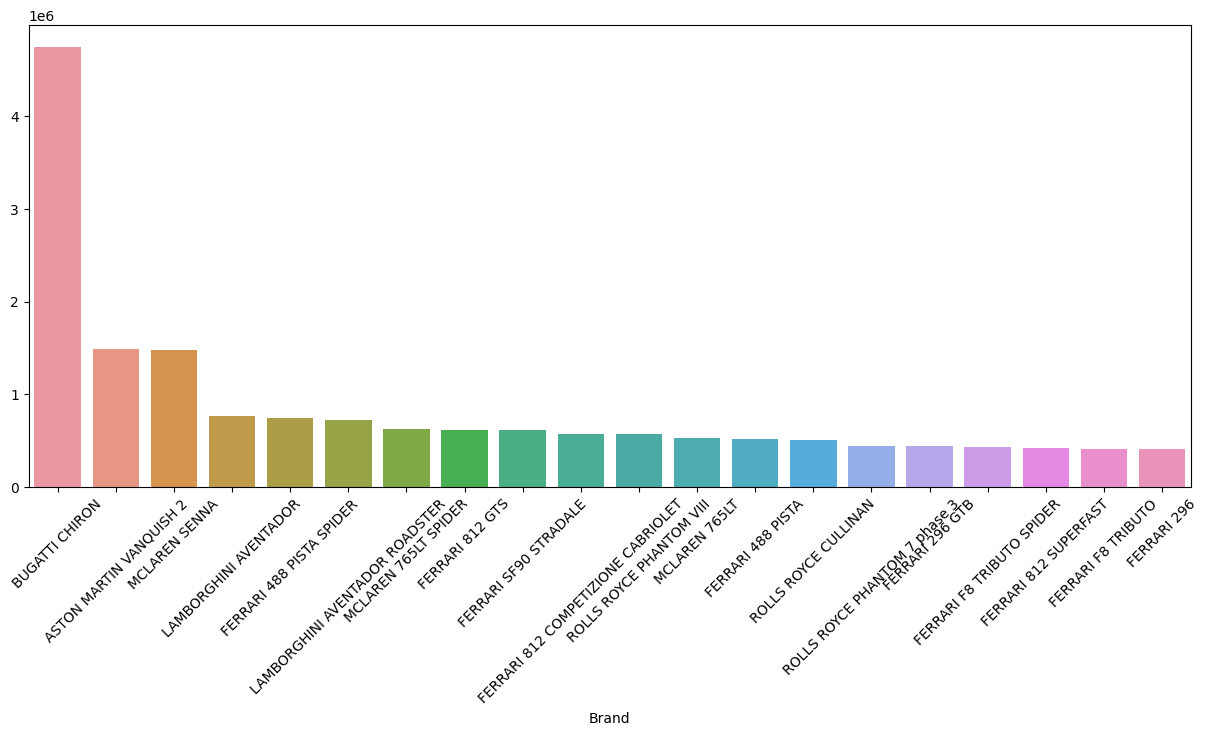

In [51]:
N = 20
top_brands = brand_avg_price.head(N)

# Plotting
plt.figure(figsize=(15, 6))  # Increase figure size for better visibility
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.xlabel('Brand')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

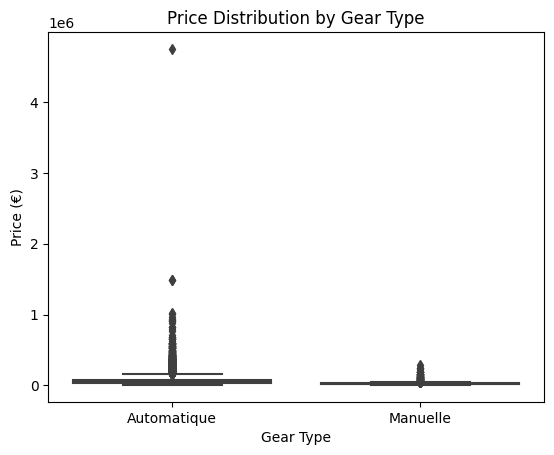

In [53]:
sns.boxplot(x='Gear', y='prix', data=df)
plt.xlabel('Gear Type')
plt.ylabel('Price (€)')
plt.title('Price Distribution by Gear Type')
plt.show()


In [54]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

ValueError: could not convert string to float: 'ABARTH 500 C II phase 2'

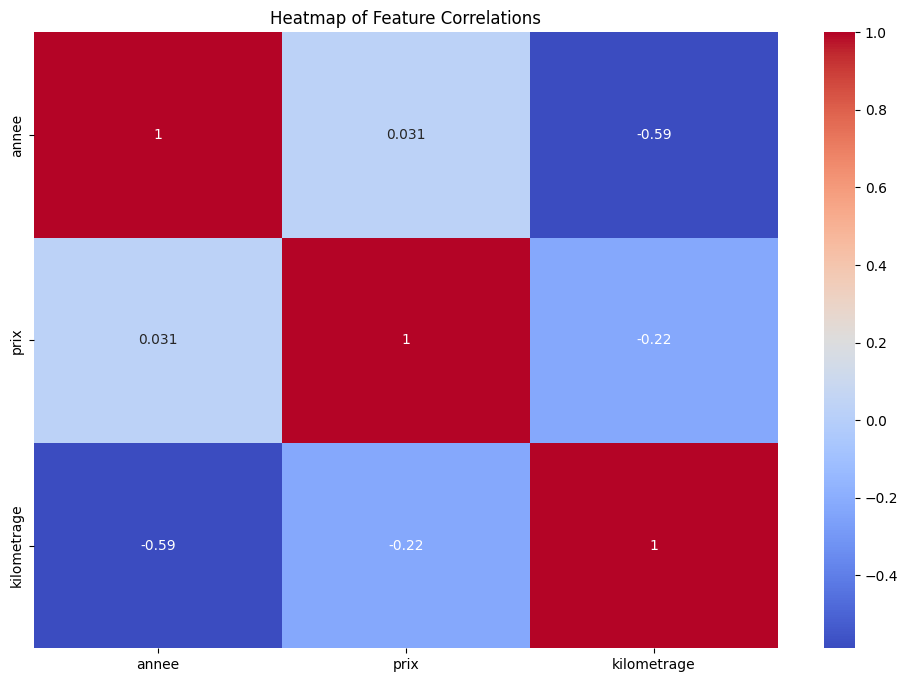

In [55]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()


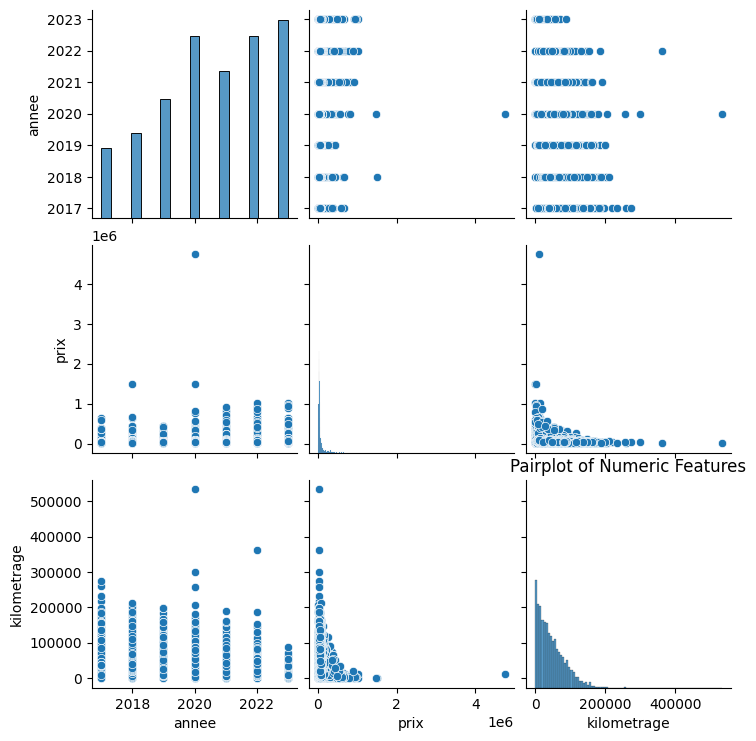

In [56]:
sns.pairplot(numeric_df)
plt.title('Pairplot of Numeric Features')
plt.show()


In [102]:
cars = df_cars.values

cars = np.char.upper(np.array(cars, dtype=str))

print(cars)

['ABARTH' 'AC' 'AIWAYS' 'AIXAM' 'ALFA+ROMEO' 'ALPINA' 'ALPINE' 'ANAIG'
 'ARIEL' 'ASTON+MARTIN' 'AUDI' 'AUSTIN+HEALEY' 'AUSTIN' 'AUTOBIANCHI'
 'BELLIER' 'BENTLEY' 'BMW' 'BOLLORE' 'BUGATTI' 'BUGGY' 'BUICK' 'BURSTNER'
 'BYD' 'CADILLAC' 'CASALINI' 'CATERHAM' 'CHALLENGER' 'CHATENET' 'CHAUSSON'
 'CHEVROLET' 'CHRYSLER' 'CITROEN' 'CLASSIC+ROADSTER' 'CUPRA' 'CURBEE'
 'DACIA' 'DAEWOO' 'DAIHATSU' 'DAIMLER' 'DALLARA' 'DANGEL' 'DATSUN'
 'DE+LOREAN' 'DE+TOMASO' 'DEVINCI' 'DFSK' 'DODGE' 'DONKERVOORT' 'DS'
 'EXCALIBUR' 'FERRARI' 'FIAT' 'FIBERFAB' 'FISKER' 'FORD' 'FUSO'
 'GAC+GONOW' 'GLAS' 'GMC' 'GOUPIL' 'HANROAD' 'HOBBY' 'HONDA' 'HOTCHKISS'
 'HUMMER' 'HYUNDAI' 'IMF' 'INFINITI' 'INNOCENTI' 'ISUZU' 'IVECO' 'JAGUAR'
 'JDM+SIMPA' 'JEEP' 'JIAYUAN' 'KARMA' 'KIA' 'KTM' 'LA+STRADA' 'LADA'
 'LAMBORGHINI' 'LANCIA' 'LAND+ROVER' 'LEAPMOTOR' 'LEXUS' 'LIGIER'
 'LINCOLN' 'LOTUS' 'LYNK+^+CO' 'MAN' 'MARCOS' 'MARUTI' 'MASERATI' 'MATRA'
 'MAYBACH' 'MAZDA' 'MCLAREN' 'MEGA' 'MERCEDES_AMG' 'MERCEDES' 'MERCURY'
 'MESSERSCHM

In [103]:
def split_brand_model(row):
    brands = cars # Add other known brands here
    for brand in brands:
        if brand in row['Brand_Model']:
            return pd.Series([brand, row['Brand_Model'].replace(brand, '').strip()])
    return pd.Series([None, None]) # Return None if no known brands are found

df[['Brand', 'Model']] = df.apply(split_brand_model, axis=1)


In [105]:
df = df.drop(columns=['Brand_Model'])
df

,departement,annee,prix,kilometrage,Gear,Energy,Brand,Model
0,0,2019,31500.0,17850,Automatique,Essence,ABARTH,500 C II phase 2
1,92,2019,34440.0,25359,Automatique,Essence,ABARTH,500 C II phase 2
2,45,2017,16630.0,124356,Manuelle,Essence,ABARTH,500 II phase 2
3,91,2022,27090.0,34720,Manuelle,Essence,ABARTH,500 II phase 2
4,33,2022,32640.0,17304,Automatique,Essence,ABARTH,500 II phase 2
...,...,...,...,...,...,...,...,...
5839,2,2019,50820.0,117440,Automatique,Hybrides,VOLVO,XC60 II
5840,6,2023,60720.0,87407,Automatique,Hybrides,VOLVO,XC60 II phase 2
5841,74,2020,36840.0,78964,Automatique,Diesel,VOLVO,XC40
5842,6,2021,36840.0,85986,Automatique,Diesel,VOLVO,XC40


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   departement  5844 non-null   object 
 1   annee        5844 non-null   int64  
 2   prix         5844 non-null   float64
 3   kilometrage  5844 non-null   int64  
 4   Gear         5844 non-null   object 
 5   Energy       5844 non-null   object 
 6   Brand        5640 non-null   object 
 7   Model        5640 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 365.4+ KB


In [107]:
df['Brand'].fillna('Unknown', inplace=True)
df['Model'].fillna('Other', inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   departement  5844 non-null   object 
 1   annee        5844 non-null   int64  
 2   prix         5844 non-null   float64
 3   kilometrage  5844 non-null   int64  
 4   Gear         5844 non-null   object 
 5   Energy       5844 non-null   object 
 6   Brand        5844 non-null   object 
 7   Model        5844 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 365.4+ KB


Text(0.5, 1.0, 'Distribution of Kilometrage')

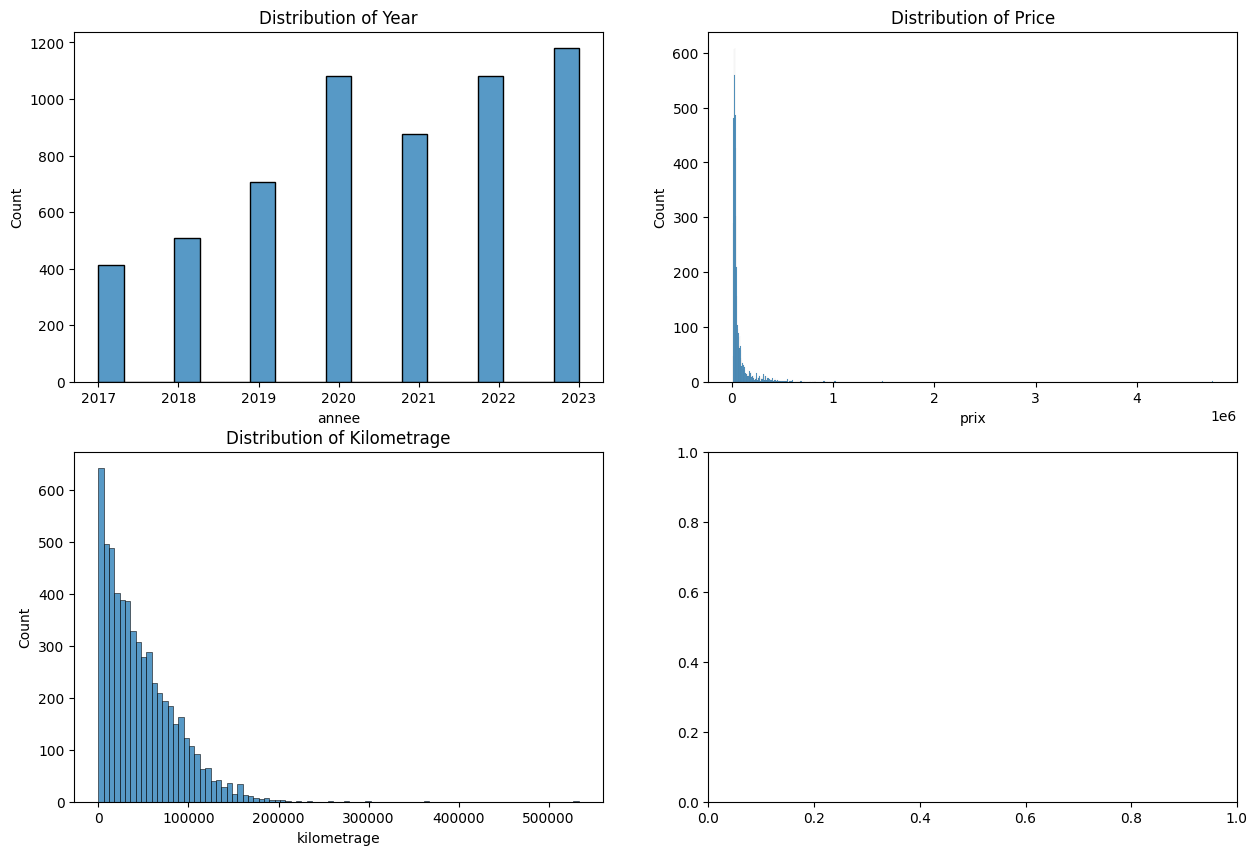

In [111]:
# Set up the figure and axis for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram for 'annee'
sns.histplot(data=df, x='annee', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Year')

# Histogram for 'prix'
sns.histplot(data=df, x='prix', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Price')

# Histogram for 'kilometrage'
sns.histplot(data=df, x='kilometrage', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Kilometrage')



<Figure size 640x480 with 0 Axes>

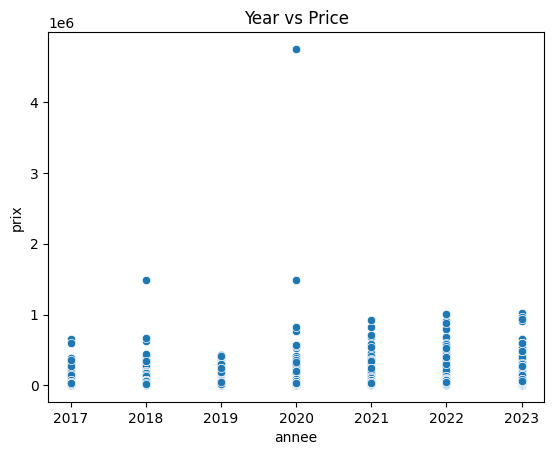

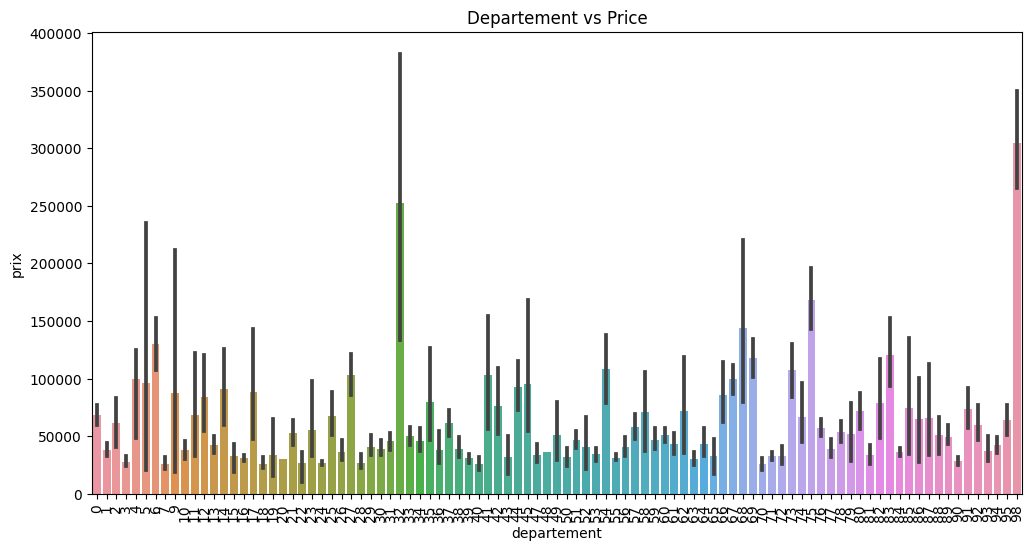

In [112]:
# Box plot for 'Gear' vs 'prix'
sns.boxplot(data=df, x='Gear', y='prix', ax=axes[1, 1])
axes[1, 1].set_title('Gear vs Price')

plt.tight_layout()
plt.show()

# Scatter plot of 'annee' vs 'prix'
sns.scatterplot(data=df, x='annee', y='prix')
plt.title('Year vs Price')
plt.show()

# Bar plot of 'departement' vs 'prix'
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='departement', y='prix')
plt.xticks(rotation=90)
plt.title('Departement vs Price')
plt.show()


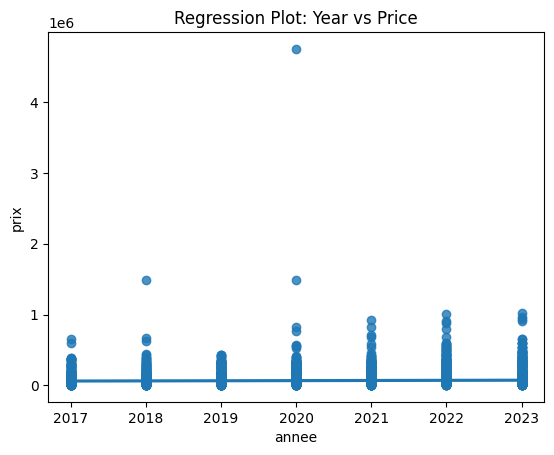

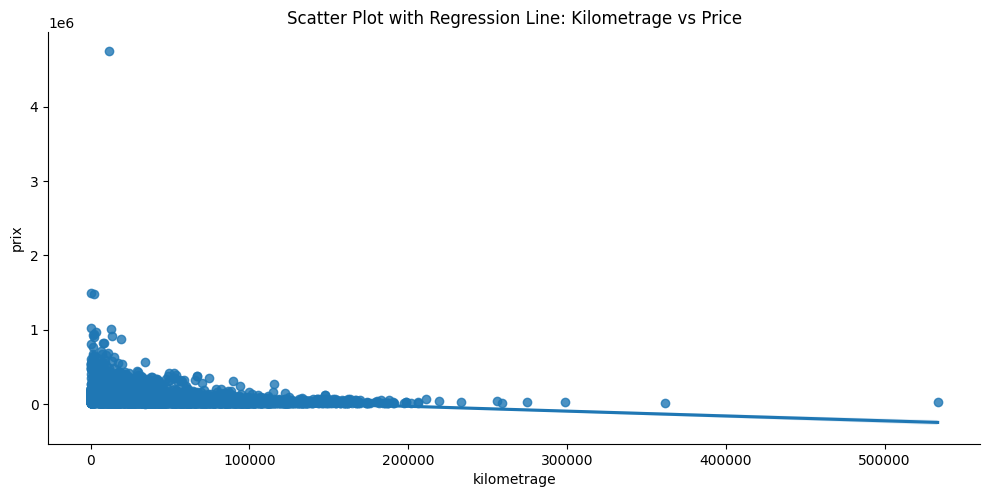

In [114]:
# Regression plot of 'annee' vs 'prix'
sns.regplot(data=df, x='annee', y='prix')
plt.title('Regression Plot: Year vs Price')
plt.show()


# Create a scatter plot with regression line
sns.lmplot(data=df, x='kilometrage', y='prix', aspect=2)
plt.title('Scatter Plot with Regression Line: Kilometrage vs Price')
plt.show()


In [115]:
df = pd.get_dummies(df, columns=['Brand', 'Gear', 'Energy', 'departement'])

In [116]:
X = df.drop(columns=['prix', 'Model'])
y = df['prix']

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, tree_predictions))

Decision Tree MSE: 3389990554.2504277


In [119]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest_predictions = forest.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, forest_predictions))

Random Forest MSE: 2644544227.6881123


In [120]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

print("SVM MSE:", mean_squared_error(y_test, svm_predictions))

SVM MSE: 10464018584.731915


In [121]:
from sklearn.model_selection import GridSearchCV

# Random Forest
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_forest = grid_search.best_estimator_

print("Best Random Forest MSE:", mean_squared_error(y_test, best_forest.predict(X_test)))


Best Random Forest MSE: 2601055904.3109345


In [124]:
#The model with the lowest MSE is the most accurate,

In [125]:
from joblib import dump

dump(best_forest, 'random_forest_modelCars.joblib')

['random_forest_modelCars.joblib']

In [133]:
print(df.columns)


Index(['annee', 'prix', 'kilometrage', 'Model', 'Brand_ABARTH', 'Brand_AC',
       'Brand_AIWAYS', 'Brand_AIXAM', 'Brand_ALPINA', 'Brand_ALPINE',
       ...
       'departement_87', 'departement_88', 'departement_89', 'departement_90',
       'departement_91', 'departement_92', 'departement_93', 'departement_94',
       'departement_95', 'departement_98'],
      dtype='object', length=195)


In [135]:
cars


array(['ABARTH', 'AC', 'AIWAYS', 'AIXAM', 'ALFA+ROMEO', 'ALPINA',
       'ALPINE', 'ANAIG', 'ARIEL', 'ASTON+MARTIN', 'AUDI',
       'AUSTIN+HEALEY', 'AUSTIN', 'AUTOBIANCHI', 'BELLIER', 'BENTLEY',
       'BMW', 'BOLLORE', 'BUGATTI', 'BUGGY', 'BUICK', 'BURSTNER', 'BYD',
       'CADILLAC', 'CASALINI', 'CATERHAM', 'CHALLENGER', 'CHATENET',
       'CHAUSSON', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 'CLASSIC+ROADSTER',
       'CUPRA', 'CURBEE', 'DACIA', 'DAEWOO', 'DAIHATSU', 'DAIMLER',
       'DALLARA', 'DANGEL', 'DATSUN', 'DE+LOREAN', 'DE+TOMASO', 'DEVINCI',
       'DFSK', 'DODGE', 'DONKERVOORT', 'DS', 'EXCALIBUR', 'FERRARI',
       'FIAT', 'FIBERFAB', 'FISKER', 'FORD', 'FUSO', 'GAC+GONOW', 'GLAS',
       'GMC', 'GOUPIL', 'HANROAD', 'HOBBY', 'HONDA', 'HOTCHKISS',
       'HUMMER', 'HYUNDAI', 'IMF', 'INFINITI', 'INNOCENTI', 'ISUZU',
       'IVECO', 'JAGUAR', 'JDM+SIMPA', 'JEEP', 'JIAYUAN', 'KARMA', 'KIA',
       'KTM', 'LA+STRADA', 'LADA', 'LAMBORGHINI', 'LANCIA', 'LAND+ROVER',
       'LEAPMOTOR'

In [136]:
import pickle

with open('brands.pkl', 'wb') as f:
    pickle.dump(cars, f)
